# Algorithm to capture region of interest


**First step:** upload and read image

1.   Import library for send file on [ Google Colab](https://colab.research.google.com)
2. Import [matplolib](https://matplotlib.org/) for read image  
3.   Upload file
4. Check if file was save in directory 



In [0]:
from google.colab import files 
import matplotlib.pyplot as plt 

In [2]:
upload_image = files.upload()

Saving WhatsApp Image 2018-08-24 at 17.02.34.jpeg to WhatsApp Image 2018-08-24 at 17.02.34.jpeg


In [3]:
! ls

download.png  sample_data  WhatsApp Image 2018-08-24 at 17.02.34.jpeg


In [0]:
# get filename by key on dictionary of the file uploaded
filename = list(upload_image.keys())[0]
lung_image = plt.imread(f'./{filename}')

**Second step:** apply filter in sended image with [scikit-image](https://scikit-image.org/)

1. Import filter library gaussian for the blur 
2. Import color library rgb2gray 
3. Import edge detector librarie Canny 
4. Apply filter of burr on image
5. Change color of image for grayscale
6. Edge detectation of the image (sigma=2.5)
7. Apply dilation in edges



In [0]:
from skimage.filters import gaussian 
from skimage.color import rgb2gray 
from skimage.feature import canny 
from skimage.morphology import binary_dilation 

In [0]:
img_blurred = gaussian(lung_image, multichannel=True, sigma=2)

In [0]:
img_rgb_to_gray = rgb2gray(img_blurred)

In [62]:
edge_img = canny(img_rgb_to_gray, sigma=2.5)

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


In [0]:
dilation_image = binary_dilation(edge_img)

**Third step:** get edges regions 

1. Import library to get edges labels
2. Import library to get edge regions 
3. Impot library to apply rectangles to the image
4. Get labels of edges 
5. Application of rectangles in the image


In [0]:
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.patches as mpatches

In [0]:
breast_labeled = label(dilation_image)


In [0]:
rectangles_region = regionprops(breast_labeled)

In [0]:
def apply_rectangle(ax, rectangles_region):
  
  for region in rectangles_region:
      # draw rectangle around regions
      minr, minc, maxr, maxc = region.bbox
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=1)
      ax.add_patch(rect)
  
  ax.set_axis_off()
  plt.tight_layout()
  return ax



**Fourth step:** plot all images 


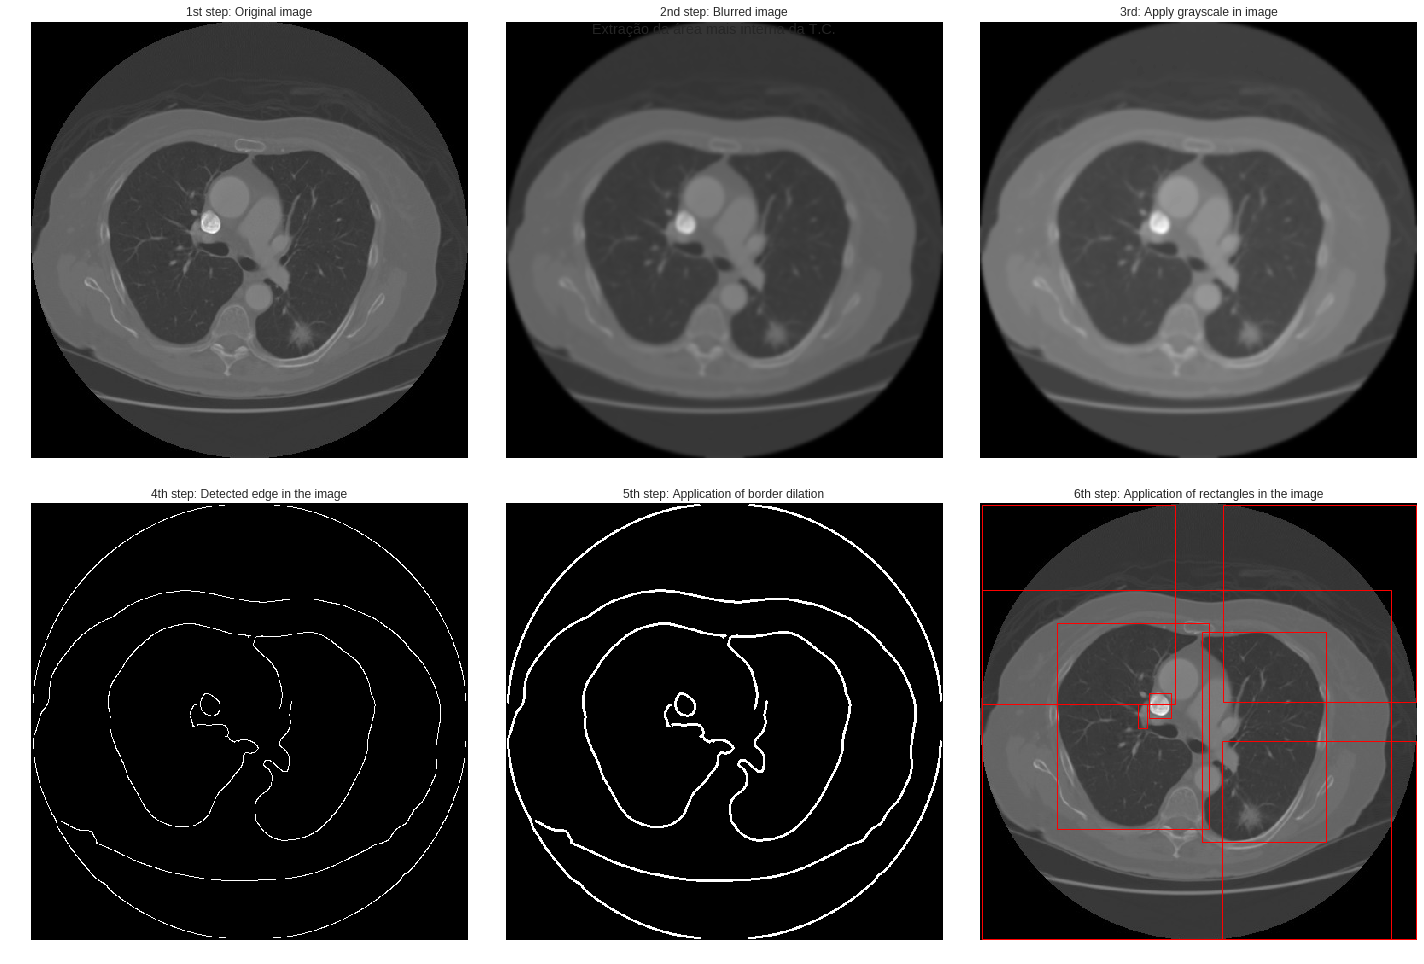

In [100]:
import numpy as np 

w = 10
h = 10
fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 3

plt.suptitle("Extração da área mais interna da T.C.")

fig.add_subplot(rows, columns, 1)
plt.title('1st step: Original image')
plt.axis('off')
plt.imshow(lung_image)

fig.add_subplot(rows, columns, 2)
plt.title('2nd step: Blurred image')
plt.axis('off')
plt.imshow(img_blurred)

fig.add_subplot(rows, columns, 3)
plt.title('3rd: Apply grayscale in image')
plt.axis('off')
plt.imshow(img_rgb_to_gray, cmap=plt.cm.gray)

fig.add_subplot(rows, columns, 4)
plt.title("4th step: Detected edge in the image")
plt.axis('off')
plt.imshow(edge_img, cmap=plt.cm.gray)

fig.add_subplot(rows, columns, 5)
plt.title("5th step: Application of border dilation")
plt.axis('off')
plt.imshow(dilation_image, cmap=plt.cm.gray)

ax = fig.add_subplot(rows, columns, 6)
plt.title("6th step: Application of rectangles in the image")
plt.axis('off')
ax.imshow(lung_image)
apply_rectangle(ax, rectangles_region)

plt.show(fig)

# Testing croping 



> Testing croping of images interest area 



In [0]:
from google.colab import files 
from skimage.filters import gaussian 
from skimage.color import rgb2gray 
from skimage.feature import canny 
from skimage.morphology import binary_dilation 
import matplotlib.pyplot as plt 
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.patches as mpatches
import numpy as np

In [125]:
upload_image = files.upload()


Saving WhatsApp Image 2018-08-24 at 17.02.34.jpeg to WhatsApp Image 2018-08-24 at 17.02.34 (1).jpeg


In [0]:
def apply_rectangle(ax, rectangles_region):
  new_imgs = []
  for region in rectangles_region:
      # draw rectangle around regions
      minr, minc, maxr, maxc = region.bbox
      rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=1)
      ax.add_patch(rect)
      new_imgs.append(cutDims(minr, minc, maxr, maxc)(lung_image))
      #break
  
  ax.set_axis_off()
  plt.tight_layout()
  return new_imgs



In [143]:
# get filename by key on dictionary of the file uploaded
filename = list(upload_image.keys())[0]
# lung_image = plt.imread(f'./{filename}')
lung_image = plt.imread(f'./{filename}')
img_blurred = gaussian(lung_image, multichannel=True, sigma=2.5)
img_rgb_to_gray = rgb2gray(img_blurred)
edge_img = canny(img_rgb_to_gray, sigma=2.5)
dilation_image = binary_dilation(edge_img)
breast_labeled = label(b)
rectangles_region = regionprops(breast_labeled)


/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


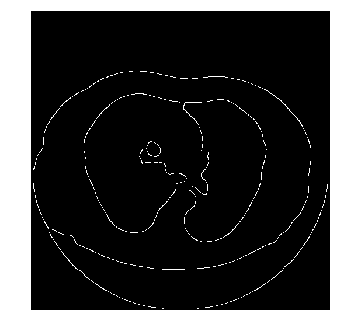

In [132]:

plt.axis('off')
plt.imshow(edge_img, cmap=plt.cm.gray)

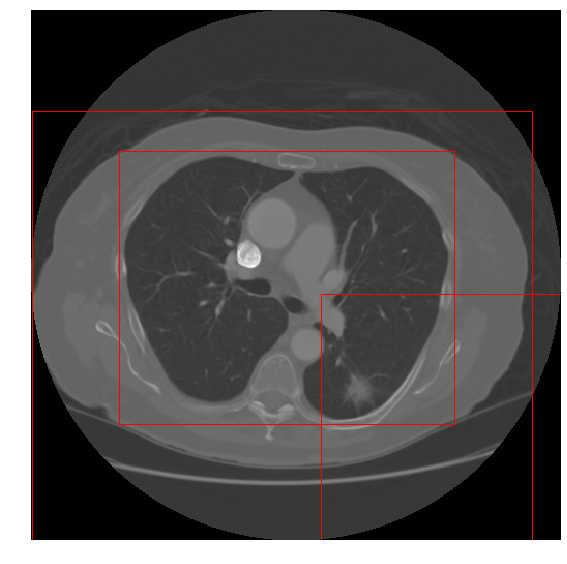

In [144]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
ax.imshow(lung_image)
a = apply_rectangle(ax, rectangles_region)


In [0]:
def cutDims(minr, minc, maxr, maxc):
  def cutImg(img):
     return img[minr: maxr, minc: maxc, 0]
  return cutImg


### Aumentando o tamanho da dilatação


In [0]:
import numpy as np 
from skimage.morphology import square
from skimage.morphology import dilation

In [0]:
 bad_connection = np.array([[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 1, 1, 1],[1, 1, 0, 1, 1],[1,1, 1, 1, 1]], dtype=np.uint8)

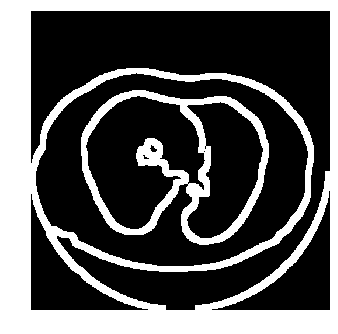

In [137]:
plt.axis('off')
b = dilation(edge_img, square(10))
plt.imshow(b, cmap=plt.cm.gray)

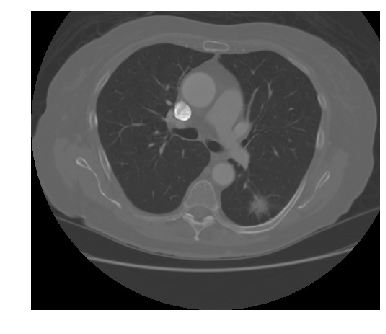

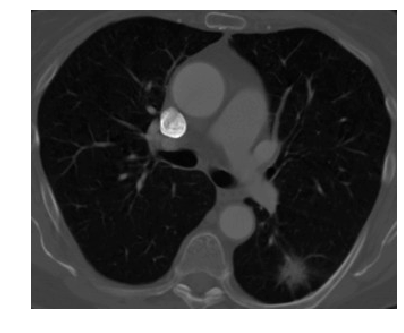

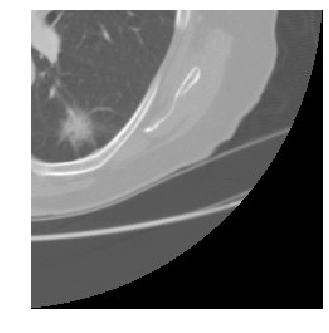

In [145]:
for i in a:
  plt.axis('off')
  plt.imshow(i, cmap=plt.cm.gray)
  plt.show()

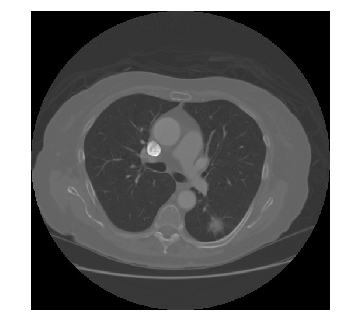

In [146]:
plt.axis('off')
plt.imshow(lung_image)